# Vector field

In [1]:
from vector_field import VectorField, field_function_1, field_function_2, field_function_3, right_flow, right_up_flow, right_up_flow
import matplotlib.pyplot as plt
import numpy as np

In [2]:
vecField = VectorField(field_function_2)

C:\modelsPython\upload_tfm\particle_simulator\vector_field.py:14: RuntimeWarning: invalid value encountered in divide
  x_component = np.sin(t) * x / np.sqrt(np.power(x, 2) + np.power(y, 2))
C:\modelsPython\upload_tfm\particle_simulator\vector_field.py:15: RuntimeWarning: invalid value encountered in divide
  y_component = np.cos(t) * y / np.sqrt(np.power(x, 2) + np.power(y, 2))


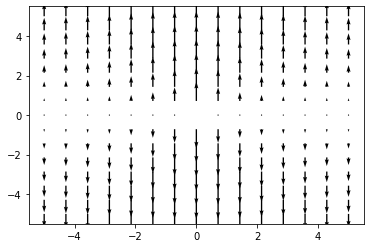

In [3]:
%matplotlib inline
vecField.plot()

In [4]:
%matplotlib qt
vecField.animate()

# Particle set

In [5]:
from particle_set import ParticleSet

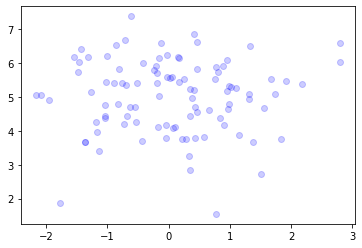

In [6]:
%matplotlib inline
pSet = ParticleSet()
pSet.init_from_cloud(x=(0,5),variance=1,n_particles=100)
pSet.plot()

In [7]:
pSet.center_of_mass()

array([0.04686483, 5.02250059])

# Simulation

In [8]:
from simulation import Simulation
np.random.seed(123)

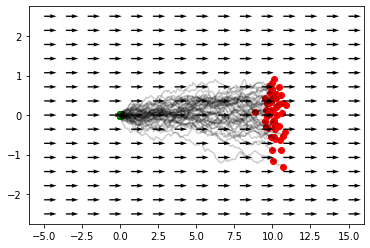

In [9]:
%matplotlib inline
# Vector field
onades = VectorField(right_flow)
# onades = VectorField(field_function_2)
# onades = VectorField(field_function_3)
# Particle set
pSet = ParticleSet()
pSet.init_from_cloud(x=(0,0),variance=0.01**2,n_particles=50)
# Simulate
sim = Simulation(vector_field=onades, particle_set=pSet)
sim.run(dt=0.1,timesteps=100)
sim.plot()

In [10]:
print("center of mass:",pSet.center_of_mass())
print("variance:",np.var(pSet.x,axis=0))
print("STDev:",np.std(pSet.x,axis=0))

center of mass: [10.07881938  0.01562186]
variance: [0.15205061 0.2561888 ]
STDev: [0.38993667 0.50615096]


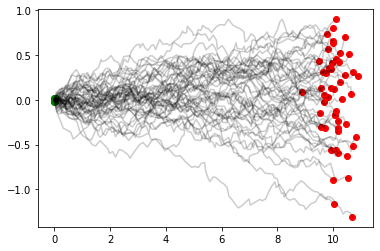

In [11]:
pSet.plot_trajectory()

In [12]:
%matplotlib qt
sim.animate()

### Time forward

In [13]:
%matplotlib inline
# Vector field
onades = VectorField(right_flow)
# Particle set
pSet = ParticleSet()
pSet.init_from_cloud(x=(0,0),variance=0.0001,n_particles=50)
print("center of mass:",pSet.center_of_mass())
print("variance:",np.var(pSet.x,axis=0))
print(pSet.spatial_variance)

center of mass: [-0.00015337 -0.00071075]
variance: [9.34699024e-05 9.29237892e-05]
[[9.34699024e-05 2.29998069e-05]
 [2.29998069e-05 9.29237892e-05]]


In [14]:
# Simulate
sim = Simulation(vector_field=onades, particle_set=pSet)
sim.run(dt=0.1,timesteps=500)
# sim.plot()

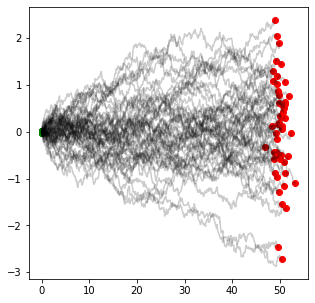

In [15]:
plt.figure(figsize=(5,5))
pSet.plot_trajectory()
# plt.axis("equal")
# plt.savefig("only_diffusion.pdf",bbox_inches='tight')

In [16]:
print("center of mass:",pSet.center_of_mass())
print("variance:",np.var(pSet.x,axis=0))
print(pSet.spatial_variance)

center of mass: [50.06158564  0.07039821]
variance: [1.24157675 1.1264447 ]
[[9.34699024e-05 2.29998069e-05]
 [2.29998069e-05 9.29237892e-05]]


### Time backwards
A cloud of particles is created at the positions where the particles arrived in the time forward simulation

In [17]:
# New particle set
new_pSet = ParticleSet()
new_pSet.init_from_existing_cloud(pSet.x)
print("center of mass:",new_pSet.center_of_mass())
print("variance:",np.var(new_pSet.x,axis=0))
print(new_pSet.spatial_variance)

center of mass: [50.06158564  0.07039821]
variance: [1.24157675 1.1264447 ]
[[ 1.24157675 -0.21005854]
 [-0.21005854  1.1264447 ]]


In [18]:
# Simulate
sim = Simulation(vector_field=onades, particle_set=new_pSet)
sim.run(dt=-0.1,timesteps=100)
# sim.plot()

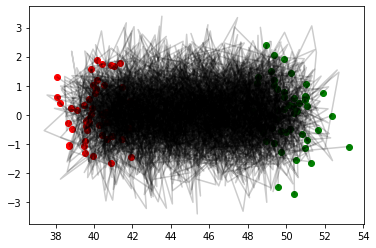

In [19]:
new_pSet.plot_trajectory()

In [20]:
print("center of mass:",new_pSet.center_of_mass())
print("variance:",np.var(new_pSet.x,axis=0))

center of mass: [40.14035843  0.09013998]
variance: [1.10355337 0.85884676]


## Rotating flow

### Time forward

In [9]:
# Vector field
onades = VectorField(right_up_flow)
# Particle set
pSet = ParticleSet()
pSet.init_from_cloud(x=(0,0),variance=0.01**2,n_particles=100)
# Simulate
sim = Simulation(vector_field=onades, particle_set=pSet)
sim.run(dt=0.1,timesteps=500)
# sim.plot()

(-15.487615492208128,
 12.919872773579073,
 -1.441084094303004,
 23.215549581427634)

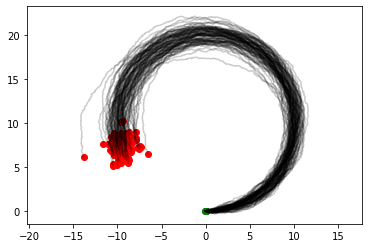

In [10]:
pSet.plot_trajectory()
plt.axis("equal")

In [11]:
print("center of mass:",pSet.center_of_mass())
print("variance:",np.var(pSet.x,axis=0))

center of mass: [-9.51621029  7.23603604]
variance: [1.01585845 0.99750482]


In [12]:
%matplotlib qt
sim.animate()

Traceback (most recent call last):
  File "C:\Users\Biel\anaconda3\envs\data_analysis\lib\site-packages\matplotlib\cbook\__init__.py", line 287, in process
    func(*args, **kwargs)
  File "C:\Users\Biel\anaconda3\envs\data_analysis\lib\site-packages\matplotlib\animation.py", line 911, in _start
    self.event_source.add_callback(self._step)
AttributeError: 'NoneType' object has no attribute 'add_callback'


### Time backward

In [41]:
# New particle set
new_pSet = ParticleSet()
new_pSet.init_from_existing_cloud(pSet.x,t=500*0.1)
# Simulate
sim = Simulation(vector_field=onades, particle_set=new_pSet)
sim.run(dt=-0.1,timesteps=500)
# sim.plot()

(-15.431279194987713,
 13.600843141149396,
 -1.7404109067934588,
 24.747767586240588)

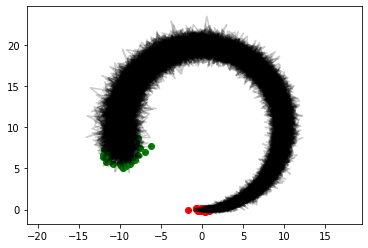

In [40]:
new_pSet.plot_trajectory()
plt.axis("equal")

In [42]:
print("center of mass:",new_pSet.center_of_mass())
print("variance:",np.var(new_pSet.x,axis=0))

center of mass: [-0.03802408 -0.05369116]
variance: [0.17930223 0.01413676]
